<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Classification%20%5BImage%5D%3A%20Hand-Gesture%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Gesture Recognition (Rock, Scissor, Paper)**

by Muhammad Efan Abdulfattah

here i'm using dataset from Dicoding's API

### Data Preparation & Preprocessing

#### **Data Preparation**

In [ ]:
# download the dataset from here
#!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

Mounted at /content/drive


In [ ]:
# unzip the dataset
# !unzip '/content/drive/My Drive/learning py/dicoding/rockpaperscissors.zip'

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

In [ ]:
# importing some dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm

# path to the dataset
path = '/content/rockpaperscissors/rps-cv-images/'

#### **Data Preprocessing**

In [ ]:
# data pre-processing
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             brightness_range=[0.2,1.0],
                             shear_range=0.2,
                             fill_mode='nearest',
                             validation_split=0.4
                             )

In [ ]:
# some init
NUM_TRAIN_DATA,NUM_TEST_DATA,BATCH_SIZE = 1314,874,64
IMG_HEIGHT,IMG_WIDTH = 100,150

# storing dataset for training/validation
train_generator = datagen.flow_from_directory(path,
                                              target_size=(IMG_HEIGHT,IMG_WIDTH),
                                              shuffle=True,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical',
                                              subset='training'
                                              )

val_generator = datagen.flow_from_directory(path,
                                            target_size=(IMG_HEIGHT,IMG_WIDTH),
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            subset='validation'
                                            )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### Data Modelling

#### **Training Phase**

In [ ]:
# configuring the model
model = Sequential([Conv2D(32, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
                    MaxPool2D(2,2),

                    Conv2D(64, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3), padding='same', activation='relu'),
                    MaxPool2D(2,2),

                    Conv2D(128, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3), padding='same', activation='relu'),
                    MaxPool2D(2,2),

                    Conv2D(256, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3), padding='same', activation='relu'),
                    MaxPool2D(2,2),

                    Flatten(),
                    Dropout(0.5),
                    
                    Dense(512, kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation='relu'),
                    Dense(3, kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation='softmax')
                    ])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 100, 150, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 37, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 18, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 18, 256)      

In [ ]:
# compile the model with some hyperparams
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy']
              )

In [ ]:
# saving the trained model automatically
cp_path = 'cp-{epoch:04d}.h5'
callback = ModelCheckpoint(filepath=cp_path,
                           monitor='val_loss',
                           save_best_only=True,
                           save_weight_only=False
                           )
model.save(cp_path.format(epoch=1))
print('Trainig Phase Started\n')


# training process begin
history = model.fit(train_generator, validation_data=val_generator, callbacks=[callback],
                    steps_per_epoch=NUM_TRAIN_DATA//BATCH_SIZE, validation_steps=NUM_TEST_DATA//BATCH_SIZE,
                    epochs=25)

Trainig Phase Started

Epoch 1/25
20/20 [==============================] - 12s 601ms/step - loss: 1.1225 - accuracy: 0.3445 - val_loss: 1.0839 - val_accuracy: 0.3594
Epoch 2/25
20/20 [==============================] - 12s 595ms/step - loss: 0.9175 - accuracy: 0.5552 - val_loss: 0.7085 - val_accuracy: 0.6995
Epoch 3/25
20/20 [==============================] - 11s 574ms/step - loss: 0.4632 - accuracy: 0.8296 - val_loss: 0.3211 - val_accuracy: 0.8894
Epoch 4/25
20/20 [==============================] - 11s 574ms/step - loss: 0.2636 - accuracy: 0.9072 - val_loss: 0.2517 - val_accuracy: 0.9062
Epoch 5/25
20/20 [==============================] - 12s 578ms/step - loss: 0.2175 - accuracy: 0.9184 - val_loss: 0.2516 - val_accuracy: 0.9038
Epoch 6/25
20/20 [==============================] - 12s 579ms/step - loss: 0.1830 - accuracy: 0.9408 - val_loss: 0.1538 - val_accuracy: 0.9459
Epoch 7/25
20/20 [==============================] - 12s 594ms/step - loss: 0.1863 - accuracy: 0.9456 - val_loss: 0.1899

In [ ]:
# loading previous trained model
#from tensorflow.keras.models import load_model

#model = load_model('model4.h5')

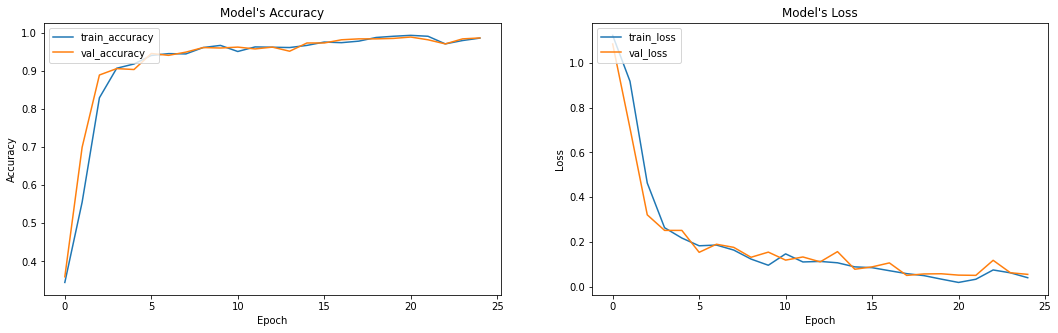

In [ ]:
# traning result viz
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(18,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title("Model's Accuracy")
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['train_accuracy', 'val_accuracy'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Model's Loss")
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['train_loss', 'val_loss'], loc='upper left')

plt.show()

#### **Testing Phase**

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png
0RA9rcrv8iVvuDDU.png

THIS IS PAPER


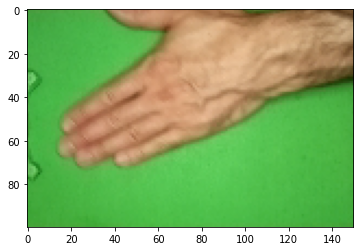

In [ ]:
# PAPER
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

uploading = files.upload()

for fn in uploading.keys():
  path = fn
  img = image.load_img(path, target_size=(IMG_HEIGHT,IMG_WIDTH))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('\nTHIS IS PAPER')
  elif classes[0][1]==1:
    print('\nTHIS IS ROCK')
  elif classes[0][2]==1:
    print('\nTHIS IS SCISSOR')
  else:
    print("\nI DON'T REALLY KNOW THAT ONE!")

Saving 7cNxwgrraQGeA1LA.png to 7cNxwgrraQGeA1LA.png
7cNxwgrraQGeA1LA.png

THIS IS ROCK


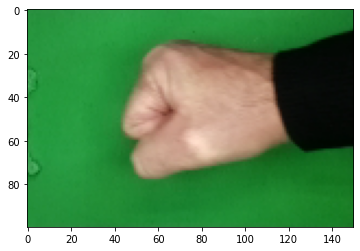

In [ ]:
# ROCK
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

uploading = files.upload()

for fn in uploading.keys():
  path = fn
  img = image.load_img(path, target_size=(IMG_HEIGHT,IMG_WIDTH))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('\nTHIS IS PAPER')
  elif classes[0][1]==1:
    print('\nTHIS IS ROCK')
  elif classes[0][2]==1:
    print('\nTHIS IS SCISSOR')
  else:
    print("\nI DON'T REALLY KNOW THAT ONE!")

Saving qHNvtsWSBDT0FnMt.png to qHNvtsWSBDT0FnMt.png
qHNvtsWSBDT0FnMt.png

THIS IS SCISSOR


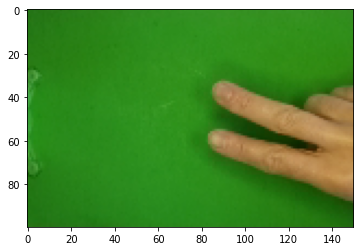

In [ ]:
# SCISSOR

from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

uploading = files.upload()

for fn in uploading.keys():
  path = fn
  img = image.load_img(path, target_size=(IMG_HEIGHT,IMG_WIDTH))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('\nTHIS IS PAPER')
  elif classes[0][1]==1:
    print('\nTHIS IS ROCK')
  elif classes[0][2]==1:
    print('\nTHIS IS SCISSOR')
  else:
    print("\nI DON'T REALLY KNOW THAT ONE!")